In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___

- Name 1: Daniel Freeman
- Name 2: Ireti Fasere
- Name 3: Tim McWilliams
- Name 4: Peter Kouvaris


# In Class Assignment One
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#Loading">Loading the Data</a>
* <a href="#linearnumpy">Linear Regression</a>
* <a href="#sklearn">Using Scikit Learn for Regression</a>
* <a href="#classification">Linear Classification</a>

________________________________________________________________________________________________________

<a id="Loading"></a>
<a href="#top">Back to Top</a>
## Loading the Data
Please run the following code to read in the "diabetes" dataset from sklearn's data loading module. 

This will load the data into the variable `ds`. `ds` is a dictionary object with fields like `ds.data`, which is a matrix of the continuous features in the dataset. The object is not a pandas dataframe. It is a numpy matrix. Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is a continuous value we are trying to predict. Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [2]:
from sklearn.datasets import load_diabetes
import numpy as np
from __future__ import print_function


ds = load_diabetes()

# this holds the continuous feature data
# because ds.data is a matrix, there are some special properties we can access (like 'shape')
print('features shape:', ds.data.shape, 'format is:', ('rows','columns')) # there are 442 instances and 10 features per instance
print('range of target:', np.min(ds.target),np.max(ds.target))

features shape: (442, 10) format is: ('rows', 'columns')
range of target: 25.0 346.0


In [3]:
from pprint import pprint

# we can set the fields inside of ds and set them to new variables in python
pprint(ds.data) # prints out elements of the matrix
pprint(ds.target) # prints the vector (all 442 items)

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])
array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
        310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
         97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
         85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
        265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,
         53.,  190.,  142.,   75.,  

________________________________________________________________________________________________________
<a id="linearnumpy"></a>
<a href="#top">Back to Top</a>
## Using Linear Regression 
In the videos, we derived the formula for calculating the optimal values of the regression weights (you must be connected to the internet for this equation to show up properly):

$$ w = (X^TX)^{-1}X^Ty $$

where $X$ is the matrix of values with a bias column of ones appended onto it. For the diabetes dataset one could construct this $X$ matrix by stacking a column of ones onto the `ds.data` matrix. 

$$ X=\begin{bmatrix}
         & \vdots &        &  1 \\
        \dotsb & \text{ds.data} & \dotsb &  \vdots\\
         & \vdots &         &  1\\
     \end{bmatrix}
$$

**Question 1:** For the diabetes dataset, how many elements will the vector $w$ contain?

In [10]:
# Enter your answer here (or write code to calculate it)

ds.data.shape[1]+1
#

11

________________________________________________________________________________________________________

**Exercise 1:** In the following empty cell, use this equation and numpy matrix operations to find the values of the vector $w$. You will need to be sure $X$ and $y$ are created like the instructor talked about in the video. Don't forget to include any modifications to $X$ to account for the bias term in $w$. You might be interested in the following functions:

- `np.hstack((mat1,mat2))` stack two matrices horizontally, to create a new matrix
- `np.ones((rows,cols))` create a matrix full of ones
- `my_mat.T` takes transpose of numpy matrix named `my_mat`
- `np.dot(mat1,mat2)` is matrix multiplication for two matrices
- `np.linalg.inv(mat)` gets the inverse of the variable `mat`

In [41]:
# Write you code here, print the values of the regression weights using the 'print()' function in python

rows = ds.data.shape[0]
ones_col = np.ones([rows,1])
X = np.hstack( (ones_col, ds.data))

y = ds.target


w = np.dot( np.dot( np.linalg.inv( np.dot(X.T, X) ) , X.T) , y)
print(np.sort(w))



[-792.18416163 -239.81908937  -10.01219782   67.62538639  101.04457032
  152.13348416  177.06417623  324.39042769  476.74583782  519.83978679
  751.27932109]


In [46]:
view = pd.DataFrame(X)


___
<a id="sklearn"></a>
<a href="#top">Back to Top</a>
# Start of Live Session Coding

**Exercise 2:** Scikit-learn also has a linear regression fitting implementation. Look at the scikit learn API and learn to use the linear regression method. The API is here: 

- API Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Use the sklearn `LinearRegression` module to check your results from the previous question. 

**Question 2**: Did you get the same parameters? 

In [53]:
from sklearn.linear_model import LinearRegression

# write your code here, print the values of model by accessing 
#    its properties that you looked up from the API
model = LinearRegression().fit(ds.data,y)


print('model coefficients are:', model.coef_)
print('model intercept is', model.intercept_)
print('Yes the parameters are the same')

[-792.18416163 -239.81908937  -10.01219782   67.62538639  101.04457032
  177.06417623  324.39042769  476.74583782  519.83978679  751.27932109]
152.133484163


________________________________________________________________________________________________________

Recall that to predict the output from our model, $\hat{y}$, from $w$ and $X$ we need to use the following formula:

- $\hat{y}=w^TX^T$

Where $X$ is a matrix with example instances in *each row* of the matrix. 

**Exercise 3:** 
- *Part A:* Use matrix multiplication to predict output using numpy, $\hat{y}_{numpy}$ and also using the sklearn regression object, $\hat{y}_{sklearn}$.
 - **Note**: you may need to make the regression weights a column vector using the following code: `w = w.reshape((len(w),1))` This assumes your weights vector is assigned to the variable named `w`.
- *Part B:* Calculate the mean squared error between your prediction from numpy and the target, $\sum_i(y-\hat{y}_{numpy})^2$. 
- *Part C:* Calculate the mean squared error between your sklearn prediction and the target, $\sum_i(y-\hat{y}_{sklearn})^2$.

In [94]:
# Use this block to answer the questions

#A
#using numpy
w = np.dot( np.dot( np.linalg.inv( np.dot(X.T, X) ) , X.T) , y)
w = w.reshape((len(w),1))

y_hat_numpy = np.dot(w.T,X.T)

#using scikit
y_hat_scikit = model.predict(ds.data)

#B
np.sum((np.square(y - y_hat_numpy)))/(len(X))

#C
from sklearn.metrics import mean_squared_error

mean_squared_error(ds.target,y_hat_scikit)


print('MSE Sklearn is:', mean_squared_error(ds.target,y_hat_scikit))
print('MSE Numpy is:', np.sum((np.square(y - y_hat_numpy)))/(len(X)))

MSE Sklearn is: 2859.69039877
MSE Numpy is: 2859.69039877


In [95]:
# print(y_hat_numpy.astype(int) - y_hat_scikit.astype(int))


________________________________________________________________________________________________________
<a id="classification"></a>
<a href="#top">Back to Top</a>
## Using Linear Classification
Now lets use the code you created to make a classifier with linear boundaries. Run the following code in order to load the iris dataset.

In [98]:
from sklearn.datasets import load_iris
import numpy as np

# this will overwrite the diabetes dataset
ds = load_iris()
print('features shape:', ds.data.shape) # there are 150 instances and 4 features per instance
print('original number of classes:', len(np.unique(ds.target)))

# now let's make this a binary classification task
ds.target = ds.target>1
print ('new number of classes:', len(np.unique(ds.target)))

features shape: (150, 4)
original number of classes: 3
new number of classes: 2


________________________________________________________________________________________________________

**Exercise 4:** Now use linear regression to come up with a set of weights, `w`, that predict the class value. This is exactly like you did before for the *diabetes* dataset. However, instead of regressing to continuous values, you are just regressing to the integer value of the class (0 or 1), like we talked about in the video. Remember to account for the bias term when constructing the feature matrix, `X`. Print the weights of the linear classifier.

$$ w = (X^TX)^{-1}X^Ty $$

In [109]:
# write your code here and print the values of the weights 

rows = ds.data.shape[0]
ones_col = np.ones([rows,1])
X = np.hstack( (ones_col, ds.data))

y = ds.target

w = np.dot( np.dot( np.linalg.inv( np.dot(X.T, X) ) , X.T) , y)

print("weights are: ", w)
# with scikit
# iris_model = LinearRegression().fit(ds.data,ds.target)

# iris_model.coef_

# iris_model.intercept_


#

weights are:  [-0.68544646 -0.04409841  0.19823256  0.00424001  0.54654271]


________________________________________________________________________________________________________

**Exercise 5:** Finally, use a hard decision function on the output of the linear regression to make this a binary classifier. This is just like we talked about in the video, where the output of the linear regression passes through a function: 

- $\hat{y}=g(w^TX^T)$ where
 - $g(w^TX^T)$ for $w^TX^T < \alpha$ maps the predicted class to `0` 
 - $g(w^TX^T)$ for $w^TX^T \geq \alpha$ maps the predicted class to `1`. 

Here, alpha is a threshold for deciding the class. 

**Question 3**: What value for $\alpha$ makes the most sense? What is the accuracy of the classifier given the $\alpha$ you chose? 

Note: You can calculate the accuracy with the following code: `accuracy = float(sum(yhat==y)) / len(y)` assuming you choose variable names `y` and `yhat` for the target and prediction, respectively.

**ANSWER** : We selected the median of our y_hat array as the alpha value. This made the most sense because it was the midpoint of an arbitrary array, produced by the linear regression function, which is not the appropriate technique for the task. Our alpha of .3454 (the median) created an accuracy of 82%. 

In [170]:
# use this box to predict the classification output
w = np.dot( np.dot( np.linalg.inv( np.dot(X.T, X) ) , X.T) , y)
w = w.reshape((len(w),1))

y_hat_numpy = np.dot(w.T,X.T)

alpha = .3454
predictions = y_hat_numpy > alpha

accuracy = float(np.sum(predictions==y)) / len(y)

print('Percentage accuracy:', accuracy)

Percentage accuracy: 0.82


### Exploration Used to Determine $\alpha$

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


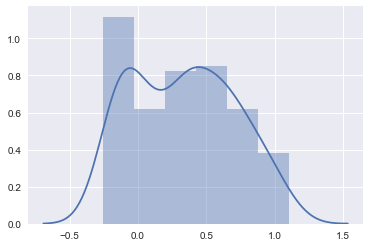

In [159]:
%matplotlib inline
import seaborn as sns
sns.distplot(y_hat_numpy)

In [171]:
pd.DataFrame(y_hat_numpy[0]).describe()

,0
count,150.000000
mean,0.333333
std,0.371411
min,-0.258480
25%,-0.031570
50%,0.345444
75%,0.629395
max,1.102903


________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.